In [1]:
import pandas

import seaborn as sns

sns.set_style("whitegrid")

In [2]:
tanggal = ["order_date"]

origin = pandas.read_table("clean_data.csv", sep=",", parse_dates=tanggal)

origin.iloc[:5, :6]

,order_id,order_status,customer,order_date,order_quantity,sales
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080
1,293,Order Finished,Barry French,2012-10-01,49,20246040
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080


In [3]:
origin.iloc[:5, 6:]

,discount,discount_value,product_category,product_sub_category
0,0.04,20923,Office Supplies,Storage & Organization
1,0.07,1417223,Office Supplies,Appliances
2,0.08,794522,Technology,Telephones & Communication
3,0.08,63083,Office Supplies,Appliances
4,0.03,5612,Office Supplies,Binders & Binder Accessories


In [4]:
origin.isnull().sum().sum()

0

In [5]:
origin["order_id"].duplicated().sum()

3

In [6]:
origin[origin["order_id"].duplicated()].iloc[:, :5]

,order_id,order_status,customer,order_date,order_quantity
186,29795,Order Cancelled,Grant Carroll,2011-11-25,49
201,31781,Order Cancelled,Sylvia Foulston,2009-01-16,46
5453,40519,Order Finished,Sandra Glassco,2010-12-21,38


In [7]:
double = origin[origin["order_id"].duplicated()]["order_id"].unique()

origin[origin["order_id"].isin(double)].iloc[:, :5]

,order_id,order_status,customer,order_date,order_quantity
185,29795,Order Finished,Grant Carroll,2011-11-25,49
186,29795,Order Cancelled,Grant Carroll,2011-11-25,49
200,31781,Order Finished,Sylvia Foulston,2009-01-16,46
201,31781,Order Cancelled,Sylvia Foulston,2009-01-16,46
244,40519,Order Cancelled,N UL L,2009-03-13,3
5453,40519,Order Finished,Sandra Glassco,2010-12-21,38


In [8]:
origin = origin[origin["order_status"] != "Order Cancelled"]

origin["order_id"].duplicated().sum()

0

In [9]:
sales = origin[origin["order_status"] == "Order Finished"]

sales.iloc[:5, :5]

,order_id,order_status,customer,order_date,order_quantity
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6
1,293,Order Finished,Barry French,2012-10-01,49
2,483,Order Finished,Clay Rozendal,2011-07-10,30
3,515,Order Finished,Carlos Soltero,2010-08-28,19
4,613,Order Finished,Carl Jackson,2011-06-17,12


In [10]:
sales.shape[0]

4924

In [11]:
sales["order_id"].nunique()

4924

In [12]:
total_sales = sales["sales"].sum()

total_sales

17267992632

In [13]:
total_order = sales["order_id"].nunique()

total_order

4924

In [14]:
sales_order = total_sales / total_order

sales_order = round(sales_order, 3)

sales_order

3506903.459

In [15]:
salder = {"sales": "sum", "order_id": "nunique"}

yearly = sales.groupby(sales["order_date"].dt.year).agg(salder)

yearly.columns = ["Sales", "Order"]

yearly = yearly.rename_axis("Year")

yearly

,Sales,Order
Year,,
2009,4613872681,1244
2010,4059100607,1248
2011,4112036186,1178
2012,4482983158,1254


In [16]:
ColDiff = lambda col : round(col.pct_change() * 100, 1)

yearly["Growth Sales"] = ColDiff(yearly["Sales"]).fillna(0)

yearly["Growth Order"] = ColDiff(yearly["Order"]).fillna(0)

yearly

,Sales,Order,Growth Sales,Growth Order
Year,,,,
2009,4613872681,1244,0.0,0.0
2010,4059100607,1248,-12.0,0.3
2011,4112036186,1178,1.3,-5.6
2012,4482983158,1254,9.0,6.5


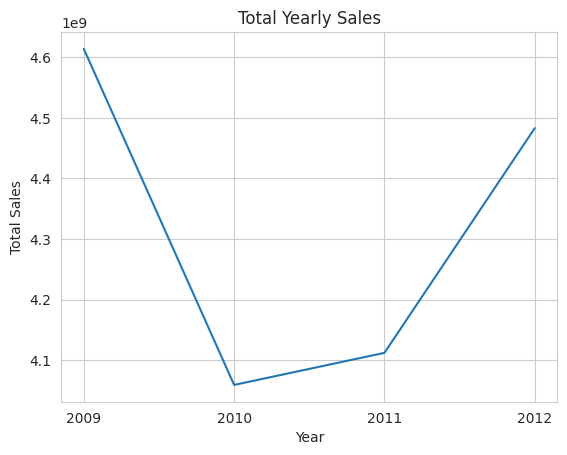

In [17]:
title = "Total Yearly Sales"

plot = yearly["Sales"].plot.line(title=title, xlabel="Year", ylabel="Total Sales")

plot.set_xticks(yearly.index);

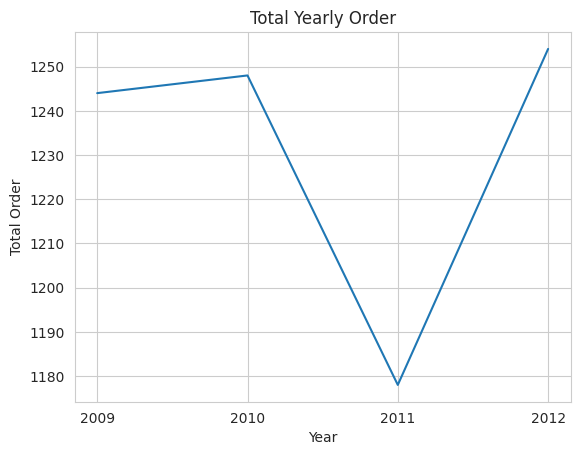

In [18]:
title = "Total Yearly Order"

plot = yearly["Order"].plot.line(title=title, xlabel="Year", ylabel="Total Order")

plot.set_xticks(yearly.index);

In [19]:
yearly["Average Sales"] = round(yearly["Sales"] / yearly["Order"], 3)

yearly

,Sales,Order,Growth Sales,Growth Order,Average Sales
Year,,,,,
2009,4613872681,1244,0.0,0.0,3708900.869
2010,4059100607,1248,-12.0,0.3,3252484.461
2011,4112036186,1178,1.3,-5.6,3490692.857
2012,4482983158,1254,9.0,6.5,3574946.697


In [20]:
customer = sales.groupby("customer").agg(salder)

customer.columns = ["Sales", "Order"]

customer = customer.rename_axis("Customer")

customer.sort_values("Sales", ascending=False).iloc[:5]

,Sales,Order
Customer,,
Emily Phan,220589920,8
Deborah Brumfield,182192930,12
Sylvia Foulston,155672633,18
Bill Donatelli,147102789,36
Christina Vanderzanden,143127604,21


In [21]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  for container in bar.containers:
    bar.bar_label(container, fmt="%1.1f")

def pieplot(result, **pieargs):
  if "colors" not in pieargs.keys():
    pieargs["colors"] = colors
  pieargs["ylabel"] = ""
  plot = result.plot.pie(**pieargs);

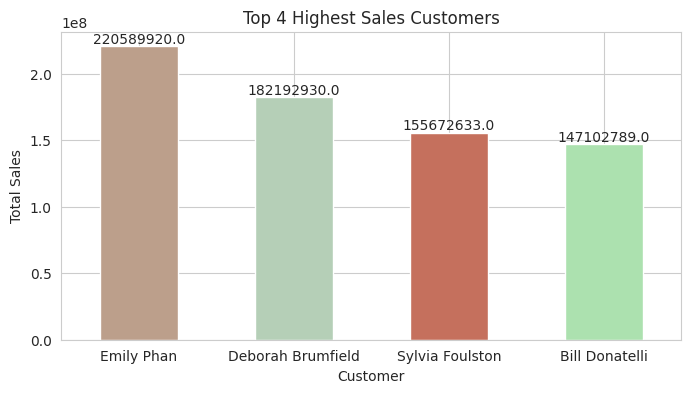

In [22]:
saleport = customer.sort_values("Sales", ascending=False).iloc[:4, 0]

title = "Top 4 Highest Sales Customers"

barplot(saleport, title=title, xlabel="Customer", ylabel="Total Sales", figsize=(8, 4))

In [23]:
customer.sort_values("Order", ascending=False).iloc[:5]

,Sales,Order
Customer,,
Bill Donatelli,147102789,36
Maria Bertelson,57956035,31
Christina Vanderzanden,143127604,21
Darren Budd,56658313,20
Jack O'Briant,59018750,20


In [24]:
yearly_customer = sales.groupby(sales["order_date"].dt.year)[["customer"]].nunique()

yearly_customer.columns = ["Customer"]

yearly_customer = yearly_customer.rename_axis("Year")

In [25]:
yearly_customer["Growth Customer"] = ColDiff(yearly_customer["Customer"]).fillna(0)

yearly_customer

,Customer,Growth Customer
Year,,
2009,585,0.0
2010,593,1.4
2011,581,-2.0
2012,594,2.2


In [26]:
custly_join = sales.groupby("customer")["order_date"].min()

custly_join = custly_join.dt.year.value_counts().to_frame()

custly_join["Growth"] = ColDiff(custly_join["count"]).fillna(0)

custly_join.columns = ["Customers", "Growth"]

custly_join = custly_join.rename_axis("Year")

custly_join

,Customers,Growth
Year,,
2009,585,0.0
2010,141,-75.9
2011,38,-73.0
2012,11,-71.1


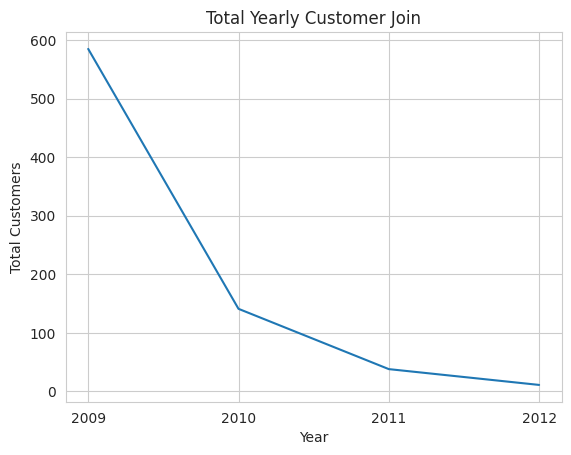

In [27]:
title = "Total Yearly Customer Join"

ylabel = "Total Customers"

plot = custly_join.iloc[:, 0].plot.line(title=title, xlabel="Year", ylabel=ylabel)

plot.set_xticks(custly_join.index);